**Import Dependancies**

In [1]:
import pandas as pd
import numpy as np

**Import dataset**

In [88]:
train_df=pd.read_csv('/kaggle/input/datasetbrainstroke/train.csv')
test_df=pd.read_csv('/kaggle/input/datasetbrainstroke/test.csv')
sub_df=pd.read_csv('/kaggle/input/datasetbrainstroke/sample_submission.csv')

In [89]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [90]:
train_df['stroke'].nunique()

2

In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [92]:
train_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [93]:
train_df.nunique()

id                   15304
gender                   3
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

In [94]:
train_df.duplicated().sum()

0

**Data Cleaning**

In [95]:
train_df['age'].unique().tolist()

[28.0,
 33.0,
 42.0,
 56.0,
 24.0,
 34.0,
 53.0,
 78.0,
 45.0,
 62.0,
 51.0,
 4.0,
 23.0,
 36.0,
 59.0,
 40.0,
 47.0,
 31.0,
 1.72,
 71.0,
 50.0,
 55.0,
 38.0,
 57.0,
 12.0,
 61.0,
 48.0,
 17.0,
 58.0,
 26.0,
 8.0,
 2.0,
 39.0,
 52.0,
 19.0,
 54.0,
 72.0,
 15.0,
 11.0,
 76.0,
 82.0,
 18.0,
 74.0,
 43.0,
 21.0,
 65.0,
 9.0,
 80.0,
 68.0,
 44.0,
 32.0,
 7.0,
 25.0,
 79.0,
 63.0,
 5.0,
 81.0,
 10.0,
 3.0,
 60.0,
 49.0,
 0.32,
 6.0,
 70.0,
 73.0,
 20.0,
 46.0,
 37.0,
 67.0,
 29.0,
 69.0,
 1.32,
 30.0,
 14.0,
 75.0,
 22.0,
 27.0,
 77.0,
 35.0,
 66.0,
 1.8,
 1.88,
 0.88,
 13.0,
 1.48,
 41.0,
 64.0,
 1.3,
 0.16,
 0.8,
 16.0,
 1.64,
 1.4,
 0.64,
 0.4,
 1.24,
 1.08,
 0.72,
 0.56,
 1.0,
 1.56,
 1.16,
 0.48,
 0.08,
 0.68,
 0.24]

In [96]:
train_df['age']=np.ceil(train_df['age'])
test_df['age']=np.ceil(test_df['age'])

In [97]:
train_df['age'].unique().tolist()

[28.0,
 33.0,
 42.0,
 56.0,
 24.0,
 34.0,
 53.0,
 78.0,
 45.0,
 62.0,
 51.0,
 4.0,
 23.0,
 36.0,
 59.0,
 40.0,
 47.0,
 31.0,
 2.0,
 71.0,
 50.0,
 55.0,
 38.0,
 57.0,
 12.0,
 61.0,
 48.0,
 17.0,
 58.0,
 26.0,
 8.0,
 39.0,
 52.0,
 19.0,
 54.0,
 72.0,
 15.0,
 11.0,
 76.0,
 82.0,
 18.0,
 74.0,
 43.0,
 21.0,
 65.0,
 9.0,
 80.0,
 68.0,
 44.0,
 32.0,
 7.0,
 25.0,
 79.0,
 63.0,
 5.0,
 81.0,
 10.0,
 3.0,
 60.0,
 49.0,
 1.0,
 6.0,
 70.0,
 73.0,
 20.0,
 46.0,
 37.0,
 67.0,
 29.0,
 69.0,
 30.0,
 14.0,
 75.0,
 22.0,
 27.0,
 77.0,
 35.0,
 66.0,
 13.0,
 41.0,
 64.0,
 16.0]

In [98]:
train_df['gender'].value_counts()

gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

In [99]:
train_df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [100]:
train_df.drop(train_df[train_df['gender']=='Other'].index,inplace=True)
test_df.drop(test_df[test_df['gender']=='Other'].index,inplace=True)

****Exploratory Analysis****

In [13]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.8 MB/s eta 0:00:00:00:0100:01


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import kaleido
sns.set_style("darkgrid")


In [102]:
plot_color=['#008080','black']
sns.set_palette(['#008080','black'])

**Filter data for stroke et non stroke**

In [103]:
no_stroke_data=train_df[train_df['stroke']==0]
stroke_data=train_df[train_df['stroke']==1]

Univariate study

In [104]:
stroke_count=train_df['stroke'].value_counts()
stroke_count

stroke
0    14671
1      632
Name: count, dtype: int64

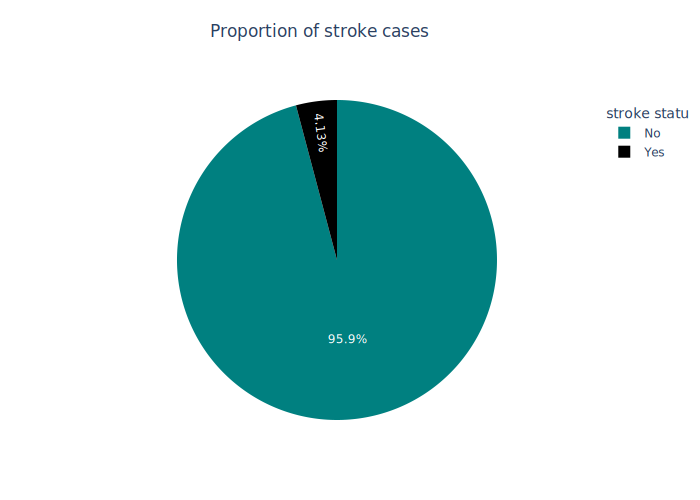

In [105]:
fig=px.pie(stroke_count,values=stroke_count.values,names=['No','Yes'],title='Proportion of stroke cases',color_discrete_sequence=plot_color)
fig.update_layout(legend_title_text='stroke status',title_x=0.3,title_y=0.95)
fig.show('svg')

In [106]:
def custum_hist(columns:str, titles:list)->go.Figure:
    fig=sp.make_subplots(rows=1,cols=2,subplot_titles=['No Stroke','Yes Stroke'])
    hist_no_stroke=px.histogram(no_stroke_data,x=columns,color_discrete_sequence=['#008080'])
    hist_stroke=px.histogram(stroke_data,x=columns,color_discrete_sequence=['#008080'])
    fig.add_trace(hist_no_stroke['data'][0],row=1,col=1)
    fig.add_trace(hist_stroke['data'][0],row=1,col=2)
    fig.update_layout(title=titles[0],title_x=0.5)
    fig.update_xaxes(title_text=titles[1])
    fig.update_yaxes(title_text='Count')
    return fig

In [107]:
custum_hist('avg_glucose_level',['Average_Glucose Level by Distribution','Average glucose level'])

In [108]:
custum_hist('age',['Age Distribution by sroke','Age'])

In [109]:

no_stroke_data['bmi'].mean()

28.022171631108993

In [110]:
stroke_data['bmi'].mean()

30.230696202531643

In [111]:
fig=px.violin(train_df, y='bmi',x='stroke',box=True,width=700,height=500,color_discrete_sequence=plot_color,title='BMI and Stroke Status',labels={'stroke':'Stroke Status','bmi':'BMI'})
fig.update_layout(title_x=0.3,title_y=0.9)
fig.show()

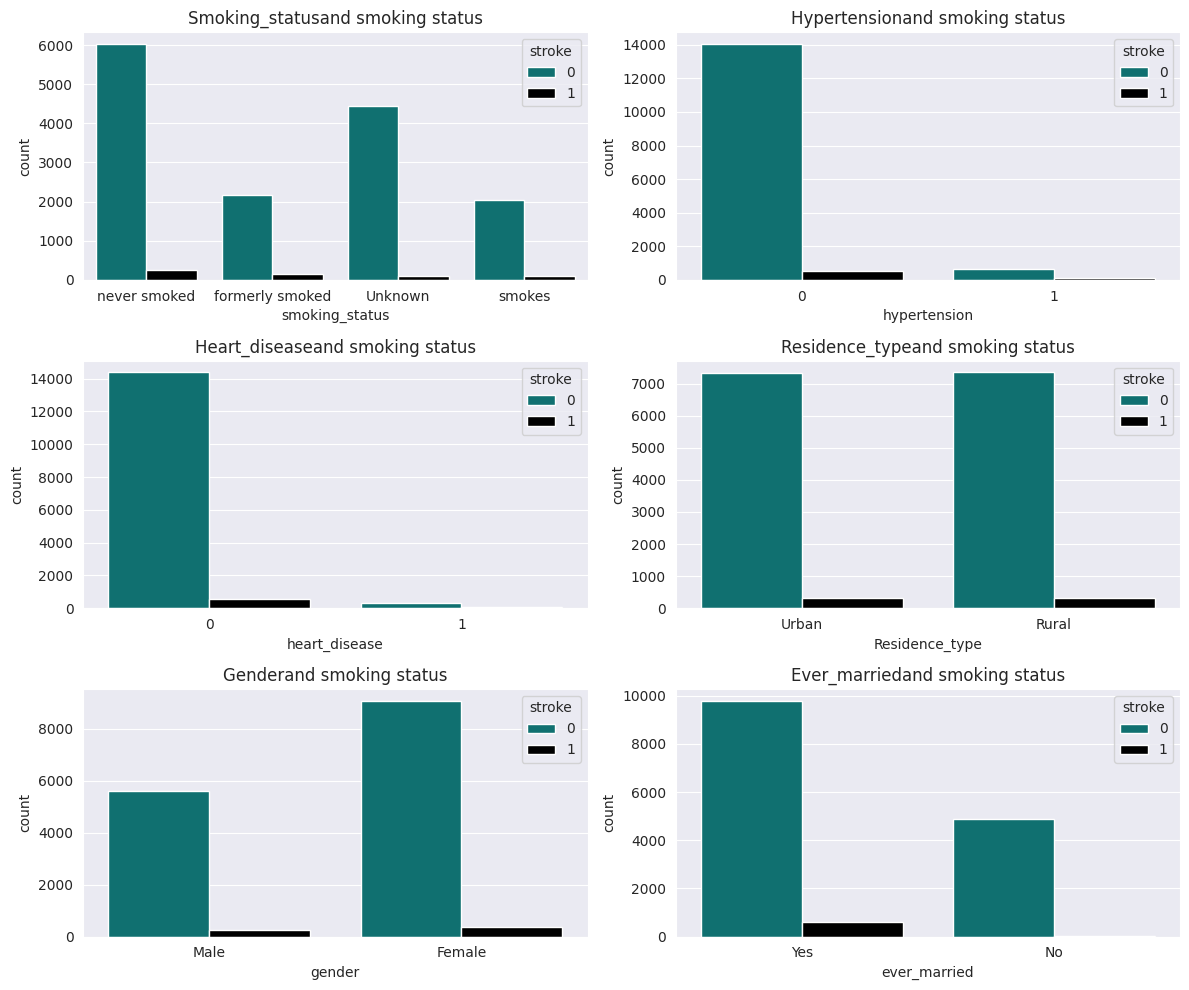

In [112]:
x_values=['smoking_status','hypertension','heart_disease','Residence_type','gender','ever_married']
fig,axis=plt.subplots(nrows=3,ncols=2,figsize=(12,10))
for ax,x_value in zip(axis.flat,x_values):
    sns.countplot(data=train_df,x=x_value,hue='stroke',ax=ax)
    ax.set_title(f'{x_value.capitalize()}and smoking status')
plt.tight_layout()
plt.show()

**Data Preparation and Preprocessing**

In [26]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

In [113]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [114]:
input_cols=list(train_df.columns)[1:-1]
target_col='stroke'

In [115]:
train_inputs=train_df[input_cols].copy()
train_target=train_df[target_col].copy()
test_inputs=test_df[input_cols].copy()

In [116]:
numerical_cols=train_inputs.select_dtypes(include=np.number).columns.to_list()
categorical_cols=train_inputs.select_dtypes(include='object').columns.to_list()


In [117]:
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [118]:
categorical_cols.remove('smoking_status')

In [119]:
train_df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [120]:
ordinal_enc=OrdinalEncoder(categories=[['never smoked', 'formerly smoked', 'Unknown', 'smokes']])

In [121]:
onehot_enc=OneHotEncoder(handle_unknown='ignore')

In [122]:
preprocessor=ColumnTransformer([('Ordinal_Encode',ordinal_enc,['smoking_status']),('OneHot_Encoder',onehot_enc,categorical_cols)])

In [123]:
preprocessor.fit(train_inputs)

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['never smoked',
                                                             'formerly smoked',
                                                             'Unknown',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [202]:
encoded_cols=list(preprocessor.get_feature_names_out())

In [203]:
encoded_cols

['Ordinal_Encode__smoking_status',
 'OneHot_Encoder__gender_Female',
 'OneHot_Encoder__gender_Male',
 'OneHot_Encoder__ever_married_No',
 'OneHot_Encoder__ever_married_Yes',
 'OneHot_Encoder__work_type_Govt_job',
 'OneHot_Encoder__work_type_Never_worked',
 'OneHot_Encoder__work_type_Private',
 'OneHot_Encoder__work_type_Self-employed',
 'OneHot_Encoder__work_type_children',
 'OneHot_Encoder__Residence_type_Rural',
 'OneHot_Encoder__Residence_type_Urban']

In [126]:
train_inputs[encoded_cols]=preprocessor.transform(train_inputs)

In [127]:
test_inputs[encoded_cols]=preprocessor.transform(test_inputs)

In [128]:
X_train=train_inputs[numerical_cols+encoded_cols]
y_train=train_df[target_col]
X_test=test_inputs[numerical_cols+encoded_cols]

In [129]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,OneHot_Encoder__gender_Female,OneHot_Encoder__gender_Male,OneHot_Encoder__ever_married_No,OneHot_Encoder__ever_married_Yes,OneHot_Encoder__work_type_Govt_job,OneHot_Encoder__work_type_Never_worked,OneHot_Encoder__work_type_Private,OneHot_Encoder__work_type_Self-employed,OneHot_Encoder__work_type_children,OneHot_Encoder__Residence_type_Rural,OneHot_Encoder__Residence_type_Urban
0,28.0,0,0,79.53,31.1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.0,0,0,78.44,23.9,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,0,0,103.00,40.3,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56.0,0,0,64.87,28.8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,24.0,0,0,73.36,28.8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [130]:
X_train.shape[1]==X_test.shape[1]

True

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [132]:
X_train.shape

(12242, 17)

**Baseline model**

In [133]:
!pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0


In [134]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [135]:
models=[(LogisticRegression(),'LogisticRegression'),(RandomForestClassifier(),'RandomClassifier'),(XGBClassifier(),'XGBClassifier'),(LGBMClassifier(verbose=1),'LightGBM')]

In [136]:
def evalue_model(model,X_train,y_train,X_val,y_val):
    y_pred=model.predict(X_val)
    confusion_mat=confusion_matrix(y_val,y_pred)
    precision=precision_score(y_val,y_pred)
    accuracy=accuracy_score(y_val,y_pred)
    recall=recall_score(y_val,y_pred)
    f1=f1_score(y_val,y_pred)
    return confusion_mat,precision,accuracy,recall,f1

In [137]:
confusion_mats={}
def metric_df(model,model_name):
    confusion_mat,*df=evalue_model(model,X_train,y_train,X_val,y_val)
    confusion_mats[model_name]=confusion_mat
    df=[df]
    model_metrics=pd.DataFrame(data=df,columns=['Precision','Accuracy','Recall','F1'])
    model_metrics.insert(0,'Model',model_name)
    return model_metrics

In [139]:
predictions=[]
for model,model_name in models: 
    model.fit(X_train,y_train)
    model_metrics=metric_df(model,model_name)
    predictions.append(model_metrics)
    

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [140]:
oversample=SMOTE()
X_train_ns,y_train_ns=oversample.fit_resample(X_train,y_train)

In [141]:
X_train_ns.shape

(23488, 17)

In [142]:
lr_with_smote=LogisticRegression()
lr_with_smote.fit(X_train_ns,y_train_ns)
lr_with_smote_mat=metric_df(lr_with_smote,'Logistic with SMOTE')
predictions.append(lr_with_smote_mat)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [143]:
for model_name, confusion_mat in confusion_mats.items():
    print(f'Confusion Matrix for {model_name}')
    print(confusion_mat)

Confusion Matrix for LogisticRegression
[[2918    9]
 [ 131    3]]
Confusion Matrix for RandomClassifier
[[2913   14]
 [ 130    4]]
Confusion Matrix for XGBClassifier
[[2901   26]
 [ 123   11]]
Confusion Matrix for LightGBM
[[2911   16]
 [ 124   10]]
Confusion Matrix for Logistic with SMOTE
[[2336  591]
 [  31  103]]


In [156]:
from sklearn.ensemble import VotingClassifier

In [159]:
estimator=[]
estimator.append(('LogisticRegression',LogisticRegression()))
estimator.append(('RandomForestClassifier',RandomForestClassifier()))
estimator.append(('XGBClassifier',XGBClassifier()))
estimator.append(('LightGBM',LGBMClassifier(verbose=1)))


In [160]:
VC_hard=VotingClassifier(estimators=estimator,voting='hard')
VC_hard.fit(X_train,y_train)
VC_hard_mat=metric_df(VC_hard,'VC_HARD')
predictions.append(VC_hard_mat)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [161]:
VC_hard_mat

,Model,Precision,Accuracy,Recall,F1
0,VC_HARD,0.272727,0.95459,0.022388,0.041379


In [162]:
VC_soft=VotingClassifier(estimators=estimator,voting='soft')
VC_soft.fit(X_train,y_train)
VC_soft_mat=metric_df(VC_soft,'VC_SOFT')
predictions.append(VC_soft_mat)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [163]:
VC_soft_mat

,Model,Precision,Accuracy,Recall,F1
0,VC_SOFT,0.380952,0.95459,0.059701,0.103226


In [166]:
prediction_base=pd.concat(predictions,ignore_index=True,sort=False)
prediction_base.sort_values(by=['Recall'],ascending=False).style.hide(axis='index')

Model,Precision,Accuracy,Recall,F1
Logistic with SMOTE,0.148415,0.796798,0.768657,0.248792
XGBClassifier,0.297297,0.951323,0.082090,0.128655
LightGBM,0.384615,0.954263,0.074627,0.125000
VC_SOFT,0.380952,0.954590,0.059701,0.103226
RandomClassifier,0.222222,0.952957,0.029851,0.052632
LogisticRegression,0.250000,0.954263,0.022388,0.041096
VC_HARD,0.272727,0.954590,0.022388,0.041379


In [176]:
models_to_plot=['LogisticRegression','RandomClassifier','XGBClassifier','Logistic with SMOTE']

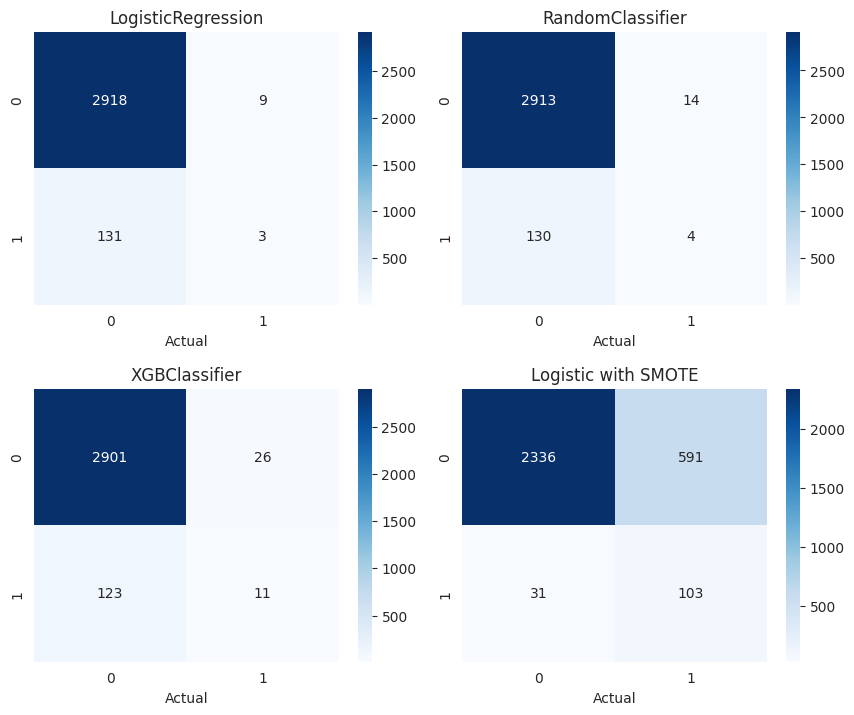

In [177]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(9,7))
for ax,model_name in zip(axes.ravel(),models_to_plot):
    confusion_mat=confusion_mats[model_name]
    sns.heatmap(confusion_mat,annot=True,fmt='d',cmap='Blues',ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_xlabel('Actual')
plt.tight_layout()
plt.subplots_adjust(left=0,right=0.9,top=0.9,bottom=0)
plt.show()
    

**AUC -ROC**

In [179]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.metrics import PredictionErrorDisplay

In [181]:
# Retraining model
X_train=train_inputs[numerical_cols+encoded_cols]
y_train=train_df[target_col]
preds=lr_with_smote.predict(X_test)

In [182]:
preds

array([1, 1, 0, ..., 0, 0, 0])

In [184]:
sub_df=preds
pd.DataFrame(sub_df).to_csv('submission.csv',index=None)

In [185]:
sub_df=pd.read_csv('submission.csv')

In [186]:
sub_df

,0
0,1
1,1
2,0
3,1
4,0
...,...
10198,0
10199,0
10200,0
10201,0


In [187]:
sub_df['stroke']=preds

In [198]:
sub_df

,0,stroke
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
10198,0,0
10199,0,0
10200,0,0
10201,0,0


In [210]:
single_input={'gender':'Male','age':33,'hypertension':0,'heart_disease':0,'ever_married':'Yes','work_type':'Private','Residence_type':'Urban','avg_glucose_level':79.53,'bmi':31.10,'smoking_status':'formerly smoked'}

In [211]:
input_df=pd.DataFrame([single_input])

In [212]:
input_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,33,0,0,Yes,Private,Urban,79.53,31.1,formerly smoked


In [213]:
input_df[encoded_cols]=preprocessor.transform(input_df)

In [214]:
X=input_df[numerical_cols+encoded_cols]

In [215]:
lr_with_smote.predict(X)

array([0])

In [217]:
import joblib
model={'encoded_cols':encoded_cols,'numerical_cols':numerical_cols,'preprocessor':preprocessor,'model':lr_with_smote}
joblib.dump(model,'model.joblib')

['model.joblib']